# USING PREDICTIVE ANALYSIS TO PREDICT DIAGNOSIS OF A BREAST TUMOR


# Part_1: Problem Statement

Breast cancer represents the predominant form of neoplasia afflicting women, constituting nearly a third of all female malignancies diagnosed in the United States, and ranking as the second most frequent cause of cancer-related mortality among women. Its pathogenesis stems from anomalous cellular proliferation within the mammary gland, which manifests in the form of an anatomical mass, or tumor. Notably, it is imperative to discern that the presence of a tumor does not necessarily connote the existence of cancer, as these growths may exhibit benign, pre-malignant, or malignant characteristics. Common modalities employed to diagnose breast cancer comprise magnetic resonance imaging, mammography, ultrasonography, and biopsy. 

## 1.1 Expected outcome

The onset of breast cancer is commonly diagnosed through the implementation of a fine-needle aspiration (FNA) test, which involves the swift and straightforward extraction of fluid or cells from a breast lesion or cyst (including lumps, sores, or swellings) by means of a slender needle akin to that of a blood sample needle. In light of this diagnostic modality, a model capable of ascertaining the tumor's classification can be constructed, incorporating two distinct training categories as follows:

1. Malignant (Cancerous) - Characterized by the presence of malignant cellular structures.
2. Benign (Not Cancerous) - Manifesting the absence of malignant cellular structures or presenting non-cancerous cell traits.
By virtue of this classification system, the model can accurately identify the tumor type, allowing healthcare practitioners to implement appropriate therapeutic strategies for optimal patient care.

## 1.2 Objective

As the labels within the data are categorical, falling under two discrete categories, namely malignant or benign, the machine learning task at hand entails classification. 

The primary objective is to differentiate between benign and malignant breast cancer and prognosticate the likelihood of recurrence or non-recurrence of malignant instances after a specified duration. To achieve this, machine learning classification techniques have been implemented to develop a function that can precisely predict the categorical class of novel inputs.

## 1.3 Identify data sources

 The Wisconsin Breast Cancer Dataset is available via [BreastCancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 ). Also can be found on UCI Machine Learning Repository. The dataset contains 569 samples of malignant and benign tumor cells.

- The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M = malignant, B = benign), respectively.
- The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

### Getting Started: Load libraries and set options

In [1]:
#load libraries
import numpy as np                                                             # linear algebra
import pandas as pd                                                            # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split #testing and splitting of dataset
from sklearn.metrics import accuracy_score                 #evaluation of classification model
from sklearn.model_selection import cross_val_score
from statistics import mean

# Read the file "data.csv" and print the contents.
df = pd.read_csv(r'C:\Users\SOURISH RASTOGI\Downloads\data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\SOURISH RASTOGI\\Downloads\\data.csv'

In [ ]:
df

### Load Dataset

First, load the supplied CSV file using additional options in the Pandas<b> <span style='background : #E9E9E9' > read_csv </span></b>  &nbsp;function.

### Inspecting the data

The first step is to visually inspect the new data set. There are multiple ways to achieve this:

- The easiest being to request the first few records using the DataFrame <b> <span style='background : #E9E9E9' > data.head()  </span></b> &nbsp;method. By default, data.head() returns the first 5 rows from the DataFrame object df (excluding the header row).
- Alternatively, one can also use <b><span style='background : #E9E9E9' > df.tail()  </span></b> &nbsp; to return the five rows of the data frame.
- For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method. Now , will inspect the data.

In [ ]:
df.head()

In [ ]:
df.info()

### By seeing the information of this dataset
- All columns have float64 data-type
- Target attribute 'diagnosis' has 'object' data-type
- It has categorical output (2) variable

The <b><span style='background : #E9E9E9' > info() </span></b>&nbsp; method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [ ]:
df.isnull().sum()

## There is not a single null value present in this dataset

In [ ]:
df['diagnosis'].value_counts()

In [ ]:
# id column is redundant and not useful, we want to drop it
df.drop(columns=['id'], axis =1,inplace=True)

In [ ]:
df.shape

- 'Diagnosis' is output variable
- It has 2 categories present - B and M
- Map it to 0 and 1

In [ ]:
diag_map = {
    "M":1,
    "B":0
}

df['diagnosis'] = df['diagnosis'].map(diag_map)

# Part_2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, we are getting familiar with the data, which will provide useful knowledge for data pre-processing.

## 2.1 Objectives of Data Exploration

Exploratory data analysis (EDA) is an important step in data analysis that should be done before modeling. It helps data scientists understand the data without making assumptions. EDA involves looking at summary statistics and visualizations to better understand the data's structure, values, and relationships. This information can be used to make assumptions and formulate hypotheses. Next step is to explore the data. There are two approached used to examine the data using:
- <b> Descriptive statistics</b> summarize key characteristics of the data using simple numbers, such as mean and standard deviation.
- <b>Visualization involves</b> representing the data in pictures or graphs.

EDA is useful in various data mining steps, including preprocessing, modeling, and interpreting results.

## 2.2 Descriptive statistics

Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many summary measurements.

In [ ]:
#basic descriptive statistics
df.describe()

In [ ]:
df.skew()

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

From the graphs, we can see that <b>radius_mean, perimeter_mean, area_mean, concavity_mean</b> and <b>concave_points_mean</b> are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that <b>area_worst</b> and <b>perimeter_worst</b> are also quite useful.

## 2.3 Unimodal Data Visualizations


One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

- Histograms.
- Density Plots.
- Box and Whisker Plots.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import seaborn as sns # data visualization


In [ ]:
#lets get the frequency of cancer diagnosis
sns.countplot(x='diagnosis', data=df)

## 2.3.1 Visualise distribution of data via histograms

Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins). Histograms group data into bins and provide you a count of the number of observations in each bin. 

### Separate columns into smaller dataframes to perform visualization

In [ ]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,and __worst) to perform visualisation plots off. 

#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]


print(df_mean.columns)

print(df_se.columns)

print(df_worst.columns)

### Histogram the <span style='background : #E9E9E9' > _mean</span></b>  &nbsp;suffix designition

In [ ]:
#Plot histograms of _mean variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)


### Histogram the <span style='background : #E9E9E9' > _se</span></b>  &nbsp;suffix designition

In [ ]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram the <span style='background : #E9E9E9' > _worst</span></b>  &nbsp;suffix designition

In [ ]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

## Observation

We can see that perhaps the attributes <b>concavity</b> ,and <b>concavity_point</b> may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## 2.3.2 Visualize distribution of data via density plots

### Density plots <span style='background : #E9E9E9' > _mean</span></b> &nbsp;suffix

In [ ]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

### Density plots <span style='background : #E9E9E9' > _se</span></b>&nbsp;suffix

In [ ]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

### Density plots <span style='background : #E9E9E9' > _worst</span></b>&nbsp;suffix

In [ ]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False, 
                    fontsize=5, figsize=(15,10))

## 2.3.3 Visualise distribution of data via box plots

### Box plot <span style='background : #E9E9E9' >  _mean</span></b>&nbsp;suffix

In [ ]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)

### Box plot <span style='background : #E9E9E9' >  _se</span></b>&nbsp;suffix

In [ ]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12)

### Box plot <span style='background : #E9E9E9' >  _worst</span></b>&nbsp;suffix 

In [ ]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
                  fontsize=12)

## 2.4 Multimodal Data Visualizations

- Scatter plots
- Correlation matrix

### Correlation matrix

In [ ]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv(r'C:\Users\SOURISH RASTOGI\Downloads\data.csv')

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2);

## Observation:

We can see strong positive relationship exists with mean values paramaters between 1 to 0.75.

- The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
- Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
- Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv(r'C:\Users\SOURISH RASTOGI\Downloads\data.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

### Part_2 Summary:

The mean values of key parameters such as cell radius, perimeter, area, compactness, concavity, and concave points can be leveraged to classify cancer. Notably, higher values of these parameters are often indicative of malignant tumors, thus providing a strong correlation. Conversely, the mean values of other parameters, such as texture, smoothness, symmetry, and fractal dimension, do not exhibit a significant preference for one diagnosis over the other.

Upon inspecting the histograms, no noticeable outliers of significant magnitude are present, and therefore, no further cleanup efforts are deemed necessary.

# Part_3: Pre-Processing the data

## Introduction

Data Pre-Processing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use. This involves a number of activities such as:

- Assigning numerical values to categorical data;
- Handling missing values; and
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

In Part_2, we explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. We identified some features of interest. Now, we use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

## Goal:

Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
#transform the class labels from their original string representation (M and B) into integers
label_encoder = LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis'])
df

After encoding the class labels(diagnosis) , the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.

In [ ]:
y=df['diagnosis']
x=df.drop(['diagnosis','id'],axis=1)

In [ ]:
x,y

### Feature Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

In [ ]:
# Normalize the  data (center around 0 and scale to remove the variance).
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
preprocessed_data=scaler.fit_transform(x)

In [ ]:
print(preprocessed_data)

In [ ]:
new_df=pd.DataFrame(preprocessed_data)

In [ ]:
new_df

# MODULE-1 
### Splitting the dataset into 3 subsets

In [ ]:
x1=x.iloc[:,:10]
x1

In [ ]:
x2=x.iloc[:,10:20]
x2

In [ ]:
x3=x.iloc[:,20:30]
x3

### Feature decomposition using Principal Component Analysis (PCA)

From the pair plot in Part_2, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. I will use PCA.

In [ ]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=10)
x1_pca=pca.fit_transform(x1)

In [ ]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=10)
x2_pca=pca.fit_transform(x2)

In [ ]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=10)
x3_pca=pca.fit_transform(x3)

### Classification with cross-validation

- In order to avoid overfitting and enable generalization of unseen data, it is critical to split the dataset into distinct training and test sets. However, this process can be further enhanced through the application of cross-validation, which involves dividing the data into similarly-sized folds, rather than relying on a single train/test split.

- During training, all folds except one are employed for training, with the remaining fold serving as the holdout sample. After completing the training, the performance of the model is assessed using the holdout sample. This holdout sample is subsequently reintroduced into the fold with the other samples, and a new fold is chosen to serve as the holdout sample for testing.

- The training process is repeated with the remaining folds, and the holdout sample is used to evaluate the performance of the fitted model. This process is repeated until each fold has had an opportunity to serve as both a test and holdout sample.

- The cross-validation error, which serves as an estimate of the expected performance of the classifier, is then computed by averaging the error rates calculated on each of the holdout samples.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
kf.get_n_splits(x1)

In [ ]:
KFold(n_splits=5, random_state=None, shuffle=False)

### Splitting the data into Training data & Testing data

In [ ]:
 x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
x1_train_pca, x1_test_pca, y1_train_pca, y1_test_pca = train_test_split(x1_pca, y, test_size=0.2, random_state=42,shuffle=False)
x2_train_pca, x2_test_pca, y2_train_pca, y2_test_pca = train_test_split(x2_pca, y, test_size=0.2, random_state=42,shuffle=True)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3_pca, y, test_size=0.2, random_state=42)

# Part_4.1: Model Training and Evaluation

## 1) SVM

In [ ]:
from sklearn import svm
svm1 = svm.SVC(random_state=42)
svm1.fit(x1_train_pca,y1_train_pca)
ypred1 = svm1.predict(x1_test_pca)
accuracy_score(y1_test_pca, ypred1)

In [ ]:
mean(cross_val_score(svm1,x1,y,cv=5,scoring=None))

In [ ]:
svm2 = svm.SVC(random_state=42)
svm2.fit(x2_train_pca, y2_train_pca)
ypred2 = svm2.predict(x2_test_pca)
accuracy_score(y2_test_pca, ypred2)

In [ ]:
mean(cross_val_score(svm2,x2,y,cv=5,scoring=None))

In [ ]:
svm3 = svm.SVC(random_state=42)
svm3.fit(x3_train, y3_train)
ypred3 = svm3.predict(x3_test)
accuracy_score(y3_test, ypred3)

In [ ]:
mean(cross_val_score(svm3,x3,y,cv=5,scoring=None))

## 2) Decision Tree

In [ ]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(random_state=78)
dt1 = dt1.fit(x1_train, y1_train)
ypred_dt1 = dt1.predict(x1_test)
accuracy_score(y1_test,ypred_dt1)

In [ ]:
mean(cross_val_score(dt1,x1,y,cv=5,scoring=None))

In [ ]:
dt2 = tree.DecisionTreeClassifier(random_state=42)
dt2 = dt2.fit(x2_train_pca, y2_train_pca)
ypred_dt2 = dt2.predict(x2_test_pca)
accuracy_score(y2_test_pca,ypred_dt2)

In [ ]:
mean(cross_val_score(dt2,x2,y,cv=5,scoring=None))

In [ ]:
dt3 = tree.DecisionTreeClassifier(random_state=42)
dt3 = dt2.fit(x3_train, y3_train)
ypred_dt3 = dt3.predict(x3_test)
accuracy_score(y3_test,ypred_dt3)

In [ ]:
mean(cross_val_score(dt3,x3,y,cv=5,scoring=None))

## 3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(x1_train,y1_train)
ypred_rf1= rf1.predict(x1_test)
accuracy_score(y1_test,ypred_rf1)

In [ ]:
mean(cross_val_score(rf1,x1,y,cv=5,scoring=None))

In [ ]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(x2_train_pca,y2_train_pca)
ypred_rf2= rf2.predict(x2_test_pca)
accuracy_score(y2_test_pca,ypred_rf2)

In [ ]:
mean(cross_val_score(rf2,x2,y,cv=5,scoring=None))

In [ ]:
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(x3_train,y3_train)
ypred_rf3= rf3.predict(x3_test)
accuracy_score(y3_test,ypred_rf3)

In [ ]:
mean(cross_val_score(rf3,x3,y,cv=5,scoring=None))

## 4) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb1 = GaussianNB()
gnb1.fit(x1_train,y1_train)
ypred_nb1 = gnb1.predict(x1_test)
accuracy_score(y1_test,ypred_nb1)

In [ ]:
mean(cross_val_score(gnb1,x1,y,cv=5,scoring=None))

In [ ]:
gnb2 = GaussianNB()
gnb2.fit(x2_train,y2_train)
ypred_nb2 = gnb2.predict(x2_test)
accuracy_score(y2_test,ypred_nb2)

In [ ]:
mean(cross_val_score(gnb2,x2,y,cv=5,scoring=None))

In [ ]:
gnb3 = GaussianNB()
gnb3.fit(x3_train,y3_train)
ypred_nb3 = gnb3.predict(x3_test)
accuracy_score(y3_test,ypred_nb3)

In [ ]:
mean(cross_val_score(gnb2,x2,y,cv=5,scoring=None))

## 5) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr1 = LogisticRegression(max_iter=250,random_state=42)
lr1.fit(x1_train_pca,y1_train_pca)
ypred_lr1 = lr1.predict(x1_test_pca)
accuracy_score(y1_test_pca,ypred_lr1)

In [ ]:
mean(cross_val_score(lr1,x1,y,cv=5,scoring=None))

In [ ]:
lr2 = LogisticRegression(max_iter=250,random_state=42)
lr2.fit(x2_train_pca,y2_train_pca)
ypred_lr2 = lr2.predict(x2_test_pca)
accuracy_score(y2_test_pca,ypred_lr2)

In [ ]:
mean(cross_val_score(lr2,x2,y,cv=5,scoring=None))

In [ ]:
lr3 = LogisticRegression(max_iter=250,random_state=42)
lr3.fit(x3_train,y3_train)
ypred_lr3 = lr3.predict(x3_test)
accuracy_score(y3_test,ypred_lr3)

In [ ]:
mean(cross_val_score(lr3,x3,y,cv=5,scoring=None))

### Graphical Representation of _mean , _se , _worst suffix of different ML models

In [ ]:
import matplotlib.pyplot  as plt
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
Mean = [94.73, 93.85, 96.49, 92.98, 89.47]
StandardError = [92.10, 87.71, 94.73, 90.35, 93.85]
Worst = [94.73, 96.49, 97.36, 94.73, 96.49]
 
# Set position of bar on X axis
br1 = np.arange(len(Mean))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Mean, color ='r', width = barWidth,
        edgecolor ='grey', label ='Mean')
plt.bar(br2, StandardError, color ='g', width = barWidth,
        edgecolor ='grey', label ='StandardError')
plt.bar(br3, Worst, color ='b', width = barWidth,
        edgecolor ='grey', label ='Worst')
 
# Adding Xticks
plt.xlabel('Machine Learning Models', fontweight ='bold', fontsize = 20)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(Mean))],
        ['SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes',  'Logistic Regression'])
 
plt.legend()
plt.show()

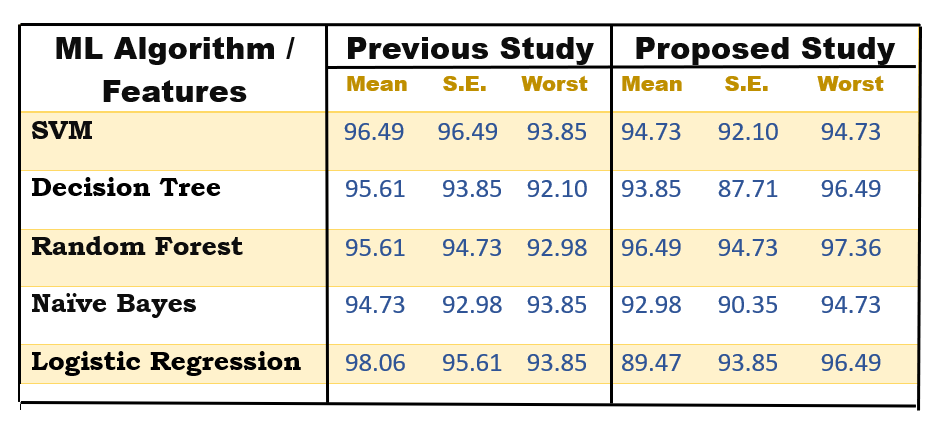

# MODULE-2
### Apllying ML Models on the whole DataSet

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
#transform the class labels from their original string representation (M and B) into integers
label_encoder = LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis'])
df

In [ ]:
new_dt=df.drop(['id'],axis=1)

In [ ]:
new_dt

In [ ]:
y_module2=new_dt['diagnosis']
x_module2=new_dt.drop(['diagnosis'],axis=1)

In [ ]:
x_module2,y_module2

In [ ]:
## Normalize the  data (center around 0 and scale to remove the variance).
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
pre_processed_data=scaler.fit_transform(x_module2)

In [ ]:
print(pre_processed_data)

In [ ]:
df_module2=pd.DataFrame(pre_processed_data)

In [ ]:
df_module2

### Splitting the data into Training data & Testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_module2,y_module2,test_size=0.2,random_state=42)

In [ ]:
print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

# Part_4.2: Model Training and Evaluation

## 4.2.1: Without Feature Engineering

## 1) SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(x_train,y_train)

In [ ]:
y_pred_svm=model_svm.predict(x_test)  #predict values
print(y_pred_svm,y_test)

In [ ]:
print("Confusion matrix of SVM is: \n",confusion_matrix(y_test,y_pred_svm))
print("Accuracy of SVM is:",accuracy_score(y_pred_svm,y_test)*100)
print("Precision of SVM is:",precision_score(y_test,y_pred_svm)*100)
print("Recall of SVM is:",recall_score(y_test,y_pred_svm)*100)

## 2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

In [ ]:
y_pred_dt=model_dt.predict(x_test)
print(y_pred_dt,y_test)

In [ ]:
print("Confusion matrix of Decision Tree Classifier is: \n",confusion_matrix(y_test,y_pred_dt))
print("Accuracy of Decision Tree Classifier is:",accuracy_score(y_pred_dt,y_test)*100)
print("Precision of Decision Tree Classifier is:",precision_score(y_test,y_pred_dt)*100)
print("Recall of Decision Tree Classifier is:",recall_score(y_test,y_pred_dt)*100)

## 3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

In [ ]:
y_pred_rf=model_rf.predict(x_test)
print(y_pred_rf,y_test)

In [ ]:
print("Confusion matrix of Random Forest is: \n",confusion_matrix(y_test,y_pred_rf))
print("Accuracy of Random Forest is:",accuracy_score(y_pred_rf,y_test)*100)
print("Precision of Random Forest is:",precision_score(y_test,y_pred_rf)*100)
print("Recall of Random Forest is:",recall_score(y_test,y_pred_rf)*100)

## 4) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

In [ ]:
y_pred_nb=model_nb.predict(x_test)
print(y_pred_nb,y_test)

In [ ]:
print("Confusion matrix of Naive Bayes is: \n",confusion_matrix(y_test,y_pred_nb))
print("Accuracy of Naive Bayes is:",accuracy_score(y_pred_nb,y_test)*100)
print("Precision of Naive Bayes is:",precision_score(y_test,y_pred_nb)*100)
print("Recall of Naive Bayes is:",recall_score(y_test,y_pred_nb)*100)

## 5) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

In [ ]:
y_pred_lr=model_lr.predict(x_test)
print(y_pred_lr,y_test)

In [ ]:
print("Confusion matrix of Logistic Regression is: \n",confusion_matrix(y_test,y_pred_lr))
print("Accuracy of Logistic Regression is:",accuracy_score(y_pred_lr,y_test)*100)
print("Precision of Logistic Regression is:",precision_score(y_test,y_pred_lr)*100)
print("Recall of Logistic Regression is:",recall_score(y_test,y_pred_lr)*100)

## 4.2.2: After Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12) 
xnew=pca.fit_transform(x_module2)
xnew

In [ ]:
xnew.shape

In [ ]:
# Splitting into Training and Testing data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnew,y_module2,test_size=0.2,random_state=42)

## 1) SVM

In [ ]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(x_train,y_train)

In [ ]:
y_pred_svm=model_svm.predict(x_test)
print(y_pred_svm)

In [ ]:
print("Confusion matrix of SVM is: \n",confusion_matrix(y_test,y_pred_svm))
print("Accuracy of SVM is:",accuracy_score(y_test,y_pred_svm)*100)
print("Precision of SVM is:",precision_score(y_test,y_pred_svm)*100)
print("Recall of SVM is:",recall_score(y_test,y_pred_svm)*100)

## 2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

In [ ]:
y_pred_dt=model_dt.predict(x_test)
print(y_pred_dt)

In [ ]:
print("Confusion matrix of Decision Tree is: \n",confusion_matrix(y_test,y_pred_dt))
print("Accuracy of Decision Tree is:",accuracy_score(y_pred_dt,y_test)*100)
print("Precision of Decision Tree is:",precision_score(y_test,y_pred_dt)*100)
print("Recall of Decision Tree is:",recall_score(y_test,y_pred_dt)*100)

## 3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

In [ ]:
y_pred_rf=model_rf.predict(x_test)
print(y_pred_rf)

In [ ]:
print("Confusion matrix of Random Forest is: \n",confusion_matrix(y_test,y_pred_rf))
print("Accuracy of Random Forest is:",accuracy_score(y_pred_rf,y_test)*100)
print("Precision of Random Forest is:",precision_score(y_test,y_pred_rf)*100)
print("Recall of Random Forest is:",recall_score(y_test,y_pred_rf)*100)

## 4) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

In [ ]:
y_pred_nb=model_nb.predict(x_test)
print(y_pred_nb)

In [ ]:
print("Confusion matrix of Naive Bayes is: \n",confusion_matrix(y_test,y_pred_nb))
print("Accuracy of Naive Bayes is:",accuracy_score(y_pred_nb,y_test)*100)
print("Precision of Naive Bayes is:",precision_score(y_test,y_pred_nb)*100)
print("Recall of Naive Bayes is:",recall_score(y_test,y_pred_nb)*100)

## 5)Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=1000,random_state=42)
model_lr.fit(x_train,y_train)

In [ ]:
y_pred_lr=model_lr.predict(x_test)
print(y_pred_lr)

In [ ]:
print("Confusion matrix of Logistic regression is: \n",confusion_matrix(y_test,y_pred_lr))
print("Accuracy of Logistic Regression is:",accuracy_score(y_pred_lr,y_test)*100)
print("Precision of Logistic Regression is:",precision_score(y_test,y_pred_lr)*100)
print("Recall of Logistic Regression is:",recall_score(y_test,y_pred_lr)*100)

### - Graphical Representation of Comparison of Accuracy of Proposed(4.2.1 ML Models) and Previous Models  

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
Proposed_Model = [97.37, 93.85, 96.49, 96.49, 98.24]
Previous_Model= [96.00, 95.00, 96.00, 92.00, 94.00]

 
# Set position of bar on X axis
br1 = np.arange(len(Proposed_Model))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, Mean, color ='g', width = barWidth,
        edgecolor ='grey', label ='Proposed')
plt.bar(br2, StandardError, color ='b', width = barWidth,
        edgecolor ='grey', label ='Previous')

 
# Adding Xticks
plt.xlabel('Machine Learning Models', fontweight ='bold', fontsize = 20)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(Proposed_Model))],
        ['SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes',  'Logistic Regression'])
 
plt.legend()
plt.show()

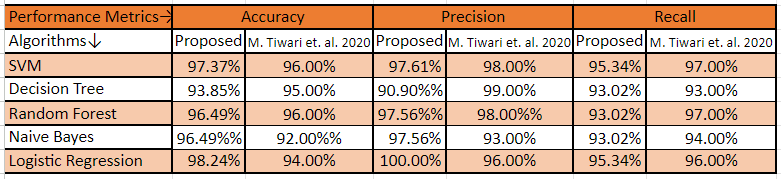

### - Graphical Comparative Analysis of Accuracy of 4.2.1 ML Models(Without PCA) and 4.2.2 Models(With PCA)

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
Without_PCA = [97.36, 93.85, 96.49, 96.49, 98.24]
With_PCA= [94.73, 92.10 , 94.73, 92.10, 95.61]

 
# Set position of bar on X axis
br1 = np.arange(len(Without_PCA))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, Mean, color ='g', width = barWidth,
        edgecolor ='grey', label ='Without PCA')
plt.bar(br2, StandardError, color ='b', width = barWidth,
        edgecolor ='grey', label ='With PCA')

 
# Adding Xticks
plt.xlabel('Machine Learning Models', fontweight ='bold', fontsize = 20)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(Without_PCA))],
        ['SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes',  'Logistic Regression'])
 
plt.legend()
plt.show()

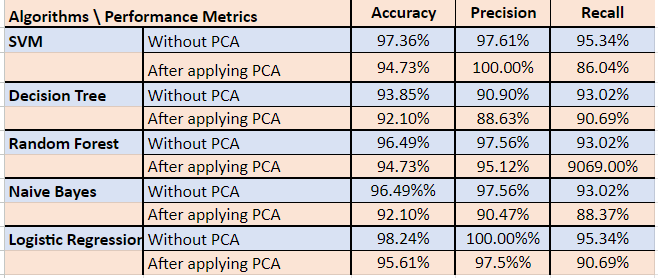